In [236]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [65]:
import matplotlib.pyplot as plt

In [112]:
# Load the data and convert it to a DataFrame

data = load_boston()
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.insert(13,'Y',data['target'])
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Feature Scaling

In [113]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [114]:
df=(df-np.mean(df))/np.std(df)

In [115]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,-3.020860e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [116]:
X = df[df.columns[:-1]]
Y = df['Y']

In [117]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [118]:
theta = np.zeros(X.shape[1]+1)
print(theta)
(theta.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(14,)

In [119]:
theta.shape

(14,)

In [120]:
X['const']=np.ones(X.shape[0])

In [121]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.0
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,1.0
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,0.0
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,1.0
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,1.0
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,1.0
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,1.0
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,1.0


In [154]:
X.shape

(506, 14)

In [167]:
def cost_function(X,Y,theta):
    m = len(Y)
    prediction = np.dot(theta,X.T)
    return (1/(m)) * np.sum((Y-prediction) ** 2)

In [168]:
cost_function(X,Y,theta)

0.999999999999999

In [170]:
mean_squared_error(np.dot(X,theta.T),Y)

0.9999999999999991

## Gradient Descent

There are types of Gradient Descent:

Batch Gradient Descent  
Mini Batch Gradient Descent  
Stochastic Gradient Descent

## Batch Gradient Descent

In [131]:
def batch_gradient_descent(X,Y,theta,alpha,iters):
    cost_history = []
    cost = cost_function(X,Y,theta)
    print("Loss:",cost)
#         print("Theta:", theta)
    cost_history.append(cost)
    
    for i in range(iters):
        prediction = np.dot(theta,X.T)
        theta = theta + (alpha/len(Y)) * np.dot((Y-prediction),X)
        cost = cost_function(X,Y,theta)
        print("Loss:",cost)
#         print("Theta:", theta)
        cost_history.append(cost)
    return theta,cost_history

In [132]:
%%time
batch_theta,batch_history = batch_gradient_descent(X,Y,theta,0.05,500)

Loss: 0.999999999999999
Loss: 0.7669049798753652
Loss: 0.6391637311126742
Loss: 0.5639428425783347
Loss: 0.5155982759296258
Loss: 0.481596113013997
Loss: 0.45573468805858797
Loss: 0.43488030337927275
Loss: 0.41739393018244836
Loss: 0.4023718819795892
Loss: 0.3892784334334295
Loss: 0.3777672841169762
Loss: 0.3675941104412726
Loss: 0.35857314051976236
Loss: 0.3505550811754079
Loss: 0.3434154671384661
Loss: 0.33704815449639847
Loss: 0.3313614024059161
Loss: 0.32627529888040663
Loss: 0.32171991949048256
Loss: 0.31763391400135516
Loss: 0.313963364688768
Loss: 0.31066083284652335
Loss: 0.30768454607124285
Loss: 0.30499769718875513
Loss: 0.3025678352852218
Loss: 0.30036633462532325
Loss: 0.2983679304101719
Loss: 0.29655031238585855
Loss: 0.2948937687685993
Loss: 0.29338087405796137
Loss: 0.2919962151952797
Loss: 0.2907261512591657
Loss: 0.2895586025129538
Loss: 0.2884828651538287
Loss: 0.287489448576064
Loss: 0.28656993236272177
Loss: 0.2857168405701392
Loss: 0.28492353117471836
Loss: 0.28418

Loss: 0.25976873585597
Loss: 0.2597660624410044
Loss: 0.25976340708680834
Loss: 0.2597607696598326
Loss: 0.2597581500277024
Loss: 0.25975554805920376
Loss: 0.2597529636242711
Loss: 0.25975039659397436
Loss: 0.2597478468405062
Loss: 0.2597453142371699
Loss: 0.25974279865836697
Loss: 0.25974029997958525
Loss: 0.25973781807738683
Loss: 0.25973535282939647
Loss: 0.25973290411428995
Loss: 0.25973047181178266
Loss: 0.2597280558026185
Loss: 0.25972565596855846
Loss: 0.25972327219237007
Loss: 0.25972090435781625
Loss: 0.25971855234964475
CPU times: user 436 ms, sys: 6.32 ms, total: 443 ms
Wall time: 445 ms


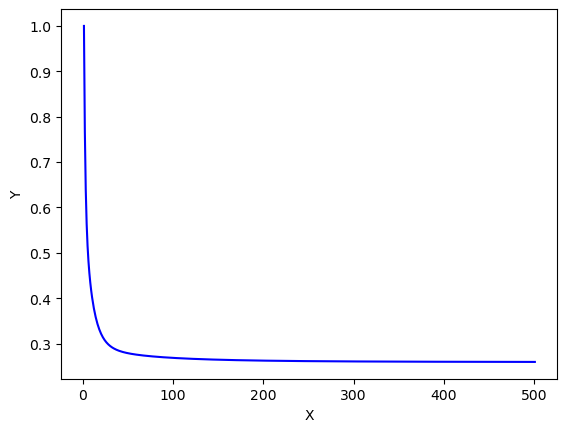

In [134]:
plt.plot(range(1,502), batch_history, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [135]:
print(batch_theta)

[-9.70181913e-02  1.10809942e-01 -3.44316814e-03  7.68565964e-02
 -2.16997868e-01  2.95334884e-01 -1.31131048e-03 -3.36283388e-01
  2.41691278e-01 -1.72900372e-01 -2.21834131e-01  9.23167078e-02
 -4.05439953e-01 -1.95653770e-15]


In [136]:
cost_function(X,Y,batch_theta)

0.25971855234964475

## Mini Batch Gradient Descent

In [229]:

def mini_batch_gradient_descent(X,Y,theta,alpha,count,batch_size=10):
#     for i in range(iters):
        cost_history = []
        cost = cost_function(X,Y,theta)
        print("Loss:",cost)
        cost_history.append(cost)
    
        for j in range(0,len(Y),batch_size):
            prediction = np.dot(theta,X.T)
            theta = theta + (alpha/len(Y)) * np.dot((Y-prediction),X)
            cost = cost_function(X,Y,theta)
            print("Loss:",cost)
#         print("Theta:", theta)
            cost_history.append(cost)
            count=count+1
        return theta,cost_history, count

In [230]:
mini_batch_theta,mini_batch_history, count = mini_batch_gradient_descent(X,Y,theta,0.05,1)

Loss: 0.999999999999999
Loss: 0.7669049798753652
Loss: 0.6391637311126742
Loss: 0.5639428425783347
Loss: 0.5155982759296258
Loss: 0.481596113013997
Loss: 0.45573468805858797
Loss: 0.43488030337927275
Loss: 0.41739393018244836
Loss: 0.4023718819795892
Loss: 0.3892784334334295
Loss: 0.3777672841169762
Loss: 0.3675941104412726
Loss: 0.35857314051976236
Loss: 0.3505550811754079
Loss: 0.3434154671384661
Loss: 0.33704815449639847
Loss: 0.3313614024059161
Loss: 0.32627529888040663
Loss: 0.32171991949048256
Loss: 0.31763391400135516
Loss: 0.313963364688768
Loss: 0.31066083284652335
Loss: 0.30768454607124285
Loss: 0.30499769718875513
Loss: 0.3025678352852218
Loss: 0.30036633462532325
Loss: 0.2983679304101719
Loss: 0.29655031238585855
Loss: 0.2948937687685993
Loss: 0.29338087405796137
Loss: 0.2919962151952797
Loss: 0.2907261512591657
Loss: 0.2895586025129538
Loss: 0.2884828651538287
Loss: 0.287489448576064
Loss: 0.28656993236272177
Loss: 0.2857168405701392
Loss: 0.28492353117471836
Loss: 0.28418

In [232]:
print(mini_batch_theta)

[-6.70194416e-02  5.06869875e-02 -4.92309408e-02  9.32350657e-02
 -6.79751005e-02  3.52458620e-01 -1.70569475e-02 -1.68078578e-01
  5.50991458e-02 -4.50178459e-02 -1.89786518e-01  9.06505593e-02
 -3.37406012e-01 -1.66412777e-15]


In [233]:
print(len(mini_batch_history))
print(count)

52
52


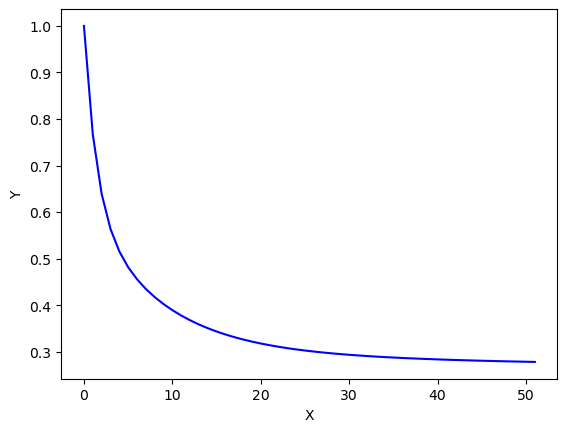

In [234]:
plt.plot(range(count), mini_batch_history, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [235]:
cost_function(X,Y,mini_batch_theta)

0.278064940505167

## Stochastic Gradient Descent

In [238]:
data = load_boston()

df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.insert(13,'target',data['target'])
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [241]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data preprocessing

In [243]:
df = (df-np.mean(df))/np.std(df)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,-3.020860e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,2.989460e+00


In [252]:
X,y = df.drop('target',axis=1),df['target']

thetas = np.zeros(X.shape[1]+1)

In [253]:
X.shape

(506, 13)

In [254]:
X['const']=np.ones(X.shape[0])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1.0
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.0
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.0
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1.0
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1.0
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1.0
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1.0


In [255]:
thetas.shape

(14,)

In [256]:
cost_function(X,y,theta)

0.999999999999999

Stochastic Gradient Descent Implementation

In [257]:
#learning schedule

t0,t1 = 5,50 # learning schedule hyperparams
def learning_schedule(t):
    return t0/(t+t1)

In [279]:
def stochastic_gradient_descent(X,y,theta,n_epochs=50):
    c_hist = []
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]

            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta = learning_schedule(epoch * len(y) + i)
            theta = theta - eta * gradients
            cost = cost_function(ind_x,ind_y,theta)
        print("Cost: ", cost)
        c_hist.append(cost)
    return theta,c_hist

In [280]:
th_n,cost_history = stochastic_gradient_descent(X,y,thetas)

Cost:  0.00021699240415737562
Cost:  0.00729320600597057
Cost:  0.8598056564001615
Cost:  0.09798956781079143
Cost:  0.011916203383065734
Cost:  0.040907666823486594
Cost:  0.34172315191424557
Cost:  1.4665488205930195
Cost:  0.2767353244804476
Cost:  1.0537559738500806
Cost:  0.006444103822336471
Cost:  0.28705178667063425
Cost:  0.1440766411102521
Cost:  0.16894518254556976
Cost:  0.846826313331265
Cost:  0.03329707383081136
Cost:  0.5430277705322386
Cost:  0.284843687860452
Cost:  0.008671623442902307
Cost:  1.038722411462933
Cost:  0.0031861186821285233
Cost:  0.7752960596493904
Cost:  0.5022863048139113
Cost:  0.31983396485840504
Cost:  0.16091801466201264
Cost:  0.132086017556267
Cost:  0.0037458518478910158
Cost:  0.21579691419651062
Cost:  0.010702318083137857
Cost:  0.03856507094897848
Cost:  1.1290064917244107
Cost:  0.42775214599081535
Cost:  6.833214463708378
Cost:  0.15657569234738392
Cost:  0.43725969013047317
Cost:  1.4154743448758993e-06
Cost:  0.008656758837599358
Cost

In [283]:
print(th_n)

CRIM      -0.063911
ZN         0.058673
INDUS     -0.138602
CHAS       0.088185
NOX       -0.174174
RM         0.325144
AGE       -0.025159
DIS       -0.332412
RAD       -0.115580
TAX        0.225675
PTRATIO   -0.213297
B          0.091739
LSTAT     -0.395853
const      0.005259
dtype: float64


In [284]:
mean_squared_error(np.dot(X,th_n.T),y)

0.2851160096492339

In [285]:
len(cost_history)

50

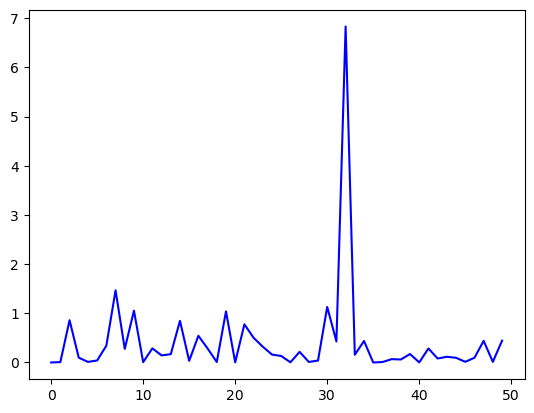

In [286]:
plt.plot(range(len(cost_history)), cost_history, color='b')
# plt.xlabel('X')
# plt.ylabel('Y')
plt.show()